In [14]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline 

In [15]:
# CSV dosyalarının okunması
exercise_data = pd.read_csv('./exercise.csv')
calories_data = pd.read_csv('./calories.csv')

# İlk 10 veriyi görüntüleme
exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


In [16]:
# Verilerin birleştirilmesi
joined_data = exercise_data.join(calories_data.set_index('User_ID'), on='User_ID', how='left') # User_ID'ye göre birleştirme
joined_data.head(10) 

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [17]:
# Cinsiyet sütununun sayısal değere dönüştürülmesi
joined_data['Gender'] = joined_data['Gender'].map({'male': 0, 'female': 1}) 

In [18]:
# Özellikler ve hedef değişkenin ayrılması
X = joined_data[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = joined_data['Calories'] 


In [19]:
# Verilerin eğitim ve test setlerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split fonksiyonu ile verileri %80 eğitim %20 test olarak ayırıyoruz.
# random_state parametresi ile verilerin karıştırılma şeklini belirliyoruz. 

#"42" sayısı genellikle yazılım ve veri bilimi topluluğunda mizahi bir referans olarak kullanılır. 
#Bu, Douglas Adams'ın "Otostopçunun Galaksi Rehberi" adlı bilim kurgu romanında, hayat, evren ve her şeye dair nihai cevabın 42 olduğuna dair bir referanstır.

In [20]:
# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler() # Standartlaştırma işlemi
X_train = scaler.fit_transform(X_train) # Eğitim seti üzerinde fit ve transform işlemi
# fit işlemi veri üzerinde öğrenme işlemi yapar.
# transform işlemi ise veriyi dönüştürür.
X_test = scaler.transform(X_test)
# Test seti üzerinde sadece transform işlemi yapılır.

In [21]:
# LightGBM regressor modelinin oluşturulması
model = lgb.LGBMRegressor()

# Modelin eğitilmesi
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 7
[LightGBM] [Info] Start training from score 89.095417


LGBMRegressor()

In [22]:
# Test seti üzerinde tahminler yapılması
y_pred = model.predict(X_test) #predict fonksiyonu ile tahmin yapılır. 

# Performans değerlendirmesi
mae = mean_absolute_error(y_test, y_pred) #mean_absolute_error fonksiyonu ile ortalama mutlak hata hesaplanır.
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 1.2834486794591151


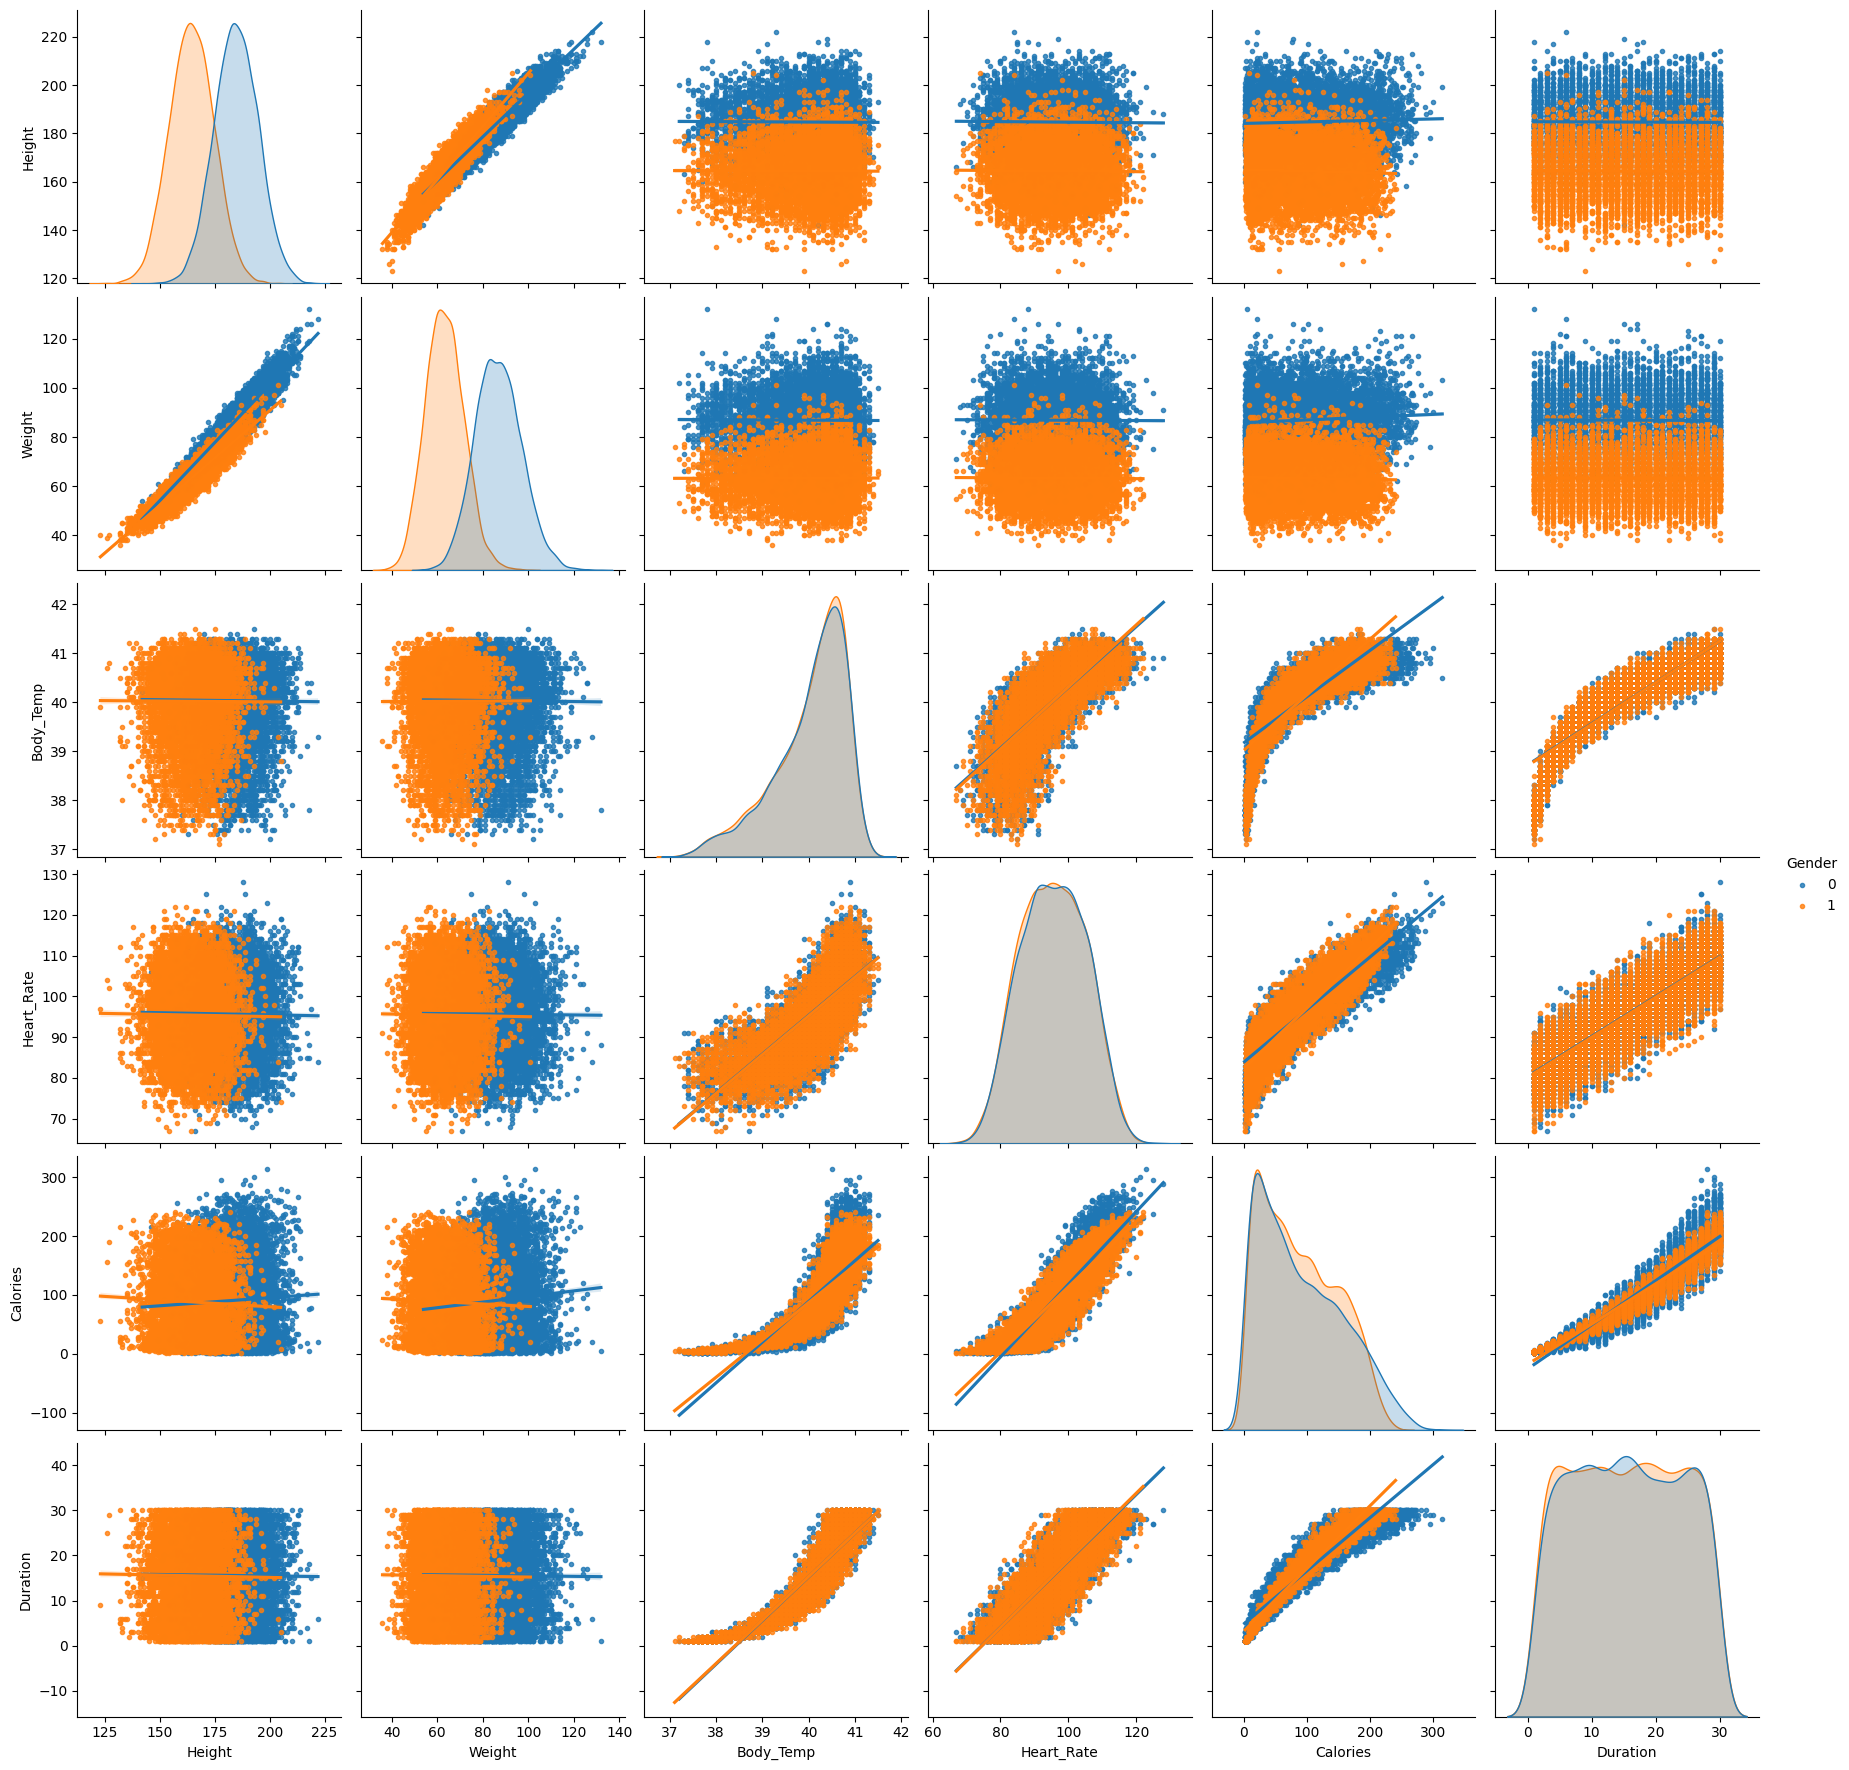

In [23]:
# Grafiklerin oluşturulması
cols = ["Height", "Weight", "Body_Temp", "Heart_Rate", "Calories", "Duration", "Gender"]
plot = sns.pairplot(joined_data[cols], height=3, markers=".", hue="Gender", kind="reg")

xlabels = []
for ax in plot.axes[-1, :]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)

y_ax_len = len(plot.axes[:, 0])
for i in range(len(xlabels)):
    for j in range(y_ax_len):
        if j != i:
            plot.axes[j, i].xaxis.set_label_text(xlabels[i])

plt.show()